In [107]:
#!pip freeze > requirements.txt

In [109]:
!pip install -r requirements.txt

## Librerie utilizzate

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix

sns.set_theme(style="darkgrid")

Carichiamo il dataset

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
test_data = pd.read_csv('test.csv')

## Analisi del dataset

In [4]:
train_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,61.760911,0.418848,580.560209,0.397906,37.801047,0.376963,257237.541623,1.414503,136.465969,0.654450,0.319372,130.193717,0.303665
std,12.309097,0.494667,1000.309497,0.490752,11.323111,0.485899,87310.444025,1.063606,4.560430,0.476797,0.467459,76.675867,0.461048
min,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,53.000000,0.000000,109.500000,0.000000,30.000000,0.000000,210500.000000,0.900000,134.000000,0.000000,0.000000,73.500000,0.000000
50%,60.000000,0.000000,233.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302500.000000,1.400000,139.000000,1.000000,1.000000,200.500000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.000000,533000.000000,9.000000,146.000000,1.000000,1.000000,285.000000,1.000000


In [5]:
train_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,60.0,0,96,1,38,0,228000.0,0.75,140,0,0,95,0
1,68.0,1,157,1,60,0,208000.0,1.00,140,0,0,237,0
2,68.0,1,577,0,25,1,166000.0,1.00,138,1,0,43,1
3,50.0,0,2522,0,30,1,404000.0,0.50,139,0,0,214,0
4,53.0,0,56,0,50,0,308000.0,0.70,135,1,1,231,0


In [6]:
train_data.shape

(191, 13)

In [7]:
test_data.shape

(48, 13)

#### Controlliamo se ci sono valori nulli

In [8]:
train_data.isnull().any().any()

False

In [9]:
test_data.isnull().any().any()

False

#### Controlliamo quante distinte classi ci sono per ciascuna feature

In [10]:
train_data.nunique()

age                          45
anaemia                       2
creatinine_phosphokinase    145
diabetes                      2
ejection_fraction            14
high_blood_pressure           2
platelets                   134
serum_creatinine             36
serum_sodium                 24
sex                           2
smoking                       2
time                        115
DEATH_EVENT                   2
dtype: int64

In [11]:
train_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

#### Facciamo delle considerazioni su alcune colonne

In [12]:
#evito eventuali valori anomali
pd.to_numeric(train_data['DEATH_EVENT'], errors='coerce')
pd.to_numeric(test_data['DEATH_EVENT'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

Text(0.5, 1.0, 'DEATH_EVENT')

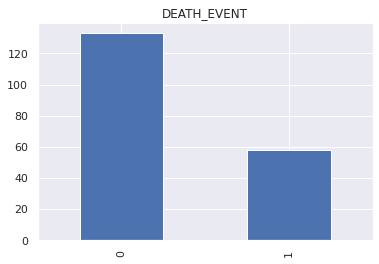

In [13]:
# controlliamo la distribuzione dei valori di DEATH_EVENT
train_data['DEATH_EVENT'].value_counts().plot(kind='bar').set_title('DEATH_EVENT')

i valori sono sbilanciati in un rapporto circa 70:30

In [14]:
train_data['DEATH_EVENT'].value_counts()

0    133
1     58
Name: DEATH_EVENT, dtype: int64

### Analisi Features

Facciamo una distinzione tra features che hanno una funzione categorica e features numeriche

In [15]:
# consideriamo features numeriche le seguenti in quanto presentano un elevato numero di classi
num_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 
               'serum_sodium', 'time']

#### Colonna age

In [16]:
train_data['age'].unique()

array([60.   , 68.   , 50.   , 53.   , 82.   , 65.   , 70.   , 55.   ,
       75.   , 45.   , 94.   , 72.   , 43.   , 85.   , 69.   , 80.   ,
       40.   , 52.   , 58.   , 63.   , 59.   , 60.667, 95.   , 62.   ,
       46.   , 42.   , 57.   , 90.   , 73.   , 44.   , 51.   , 64.   ,
       61.   , 86.   , 56.   , 81.   , 54.   , 87.   , 41.   , 66.   ,
       78.   , 49.   , 67.   , 79.   , 48.   ])

In [17]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['age'], errors='coerce')
pd.to_numeric(test_data['age'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

DEATH_EVENT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

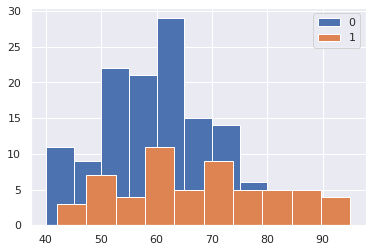

In [18]:
train_data[["DEATH_EVENT","age"]].groupby('DEATH_EVENT').age.hist(legend=True)

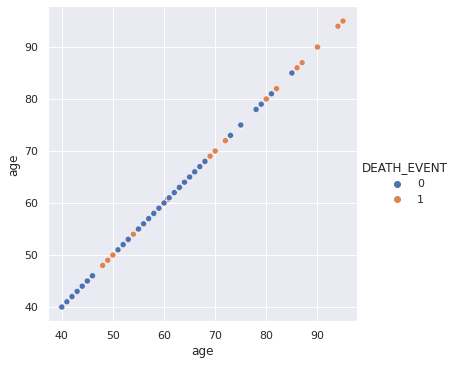

In [19]:
sns.relplot(x="age", y="age", hue="DEATH_EVENT", data=train_data);

#### Osservazioni: 
- La colonna **age** è una feature significativa in correlazione al target
- ci sono valori anomali (es. 60.667), si potrebbero scartare o considerare un loro arrotondamento
- età minima osservata: 40 ; età massima osservata: 95
- considerare la possbilità di avere età in altri formati anomali (es. età < 0) e scartarle

#### Avendo effettuato le stesse analisi tramite grafici alle restanti features numeriche riportiamo le seguenti considerazioni:

In [20]:
#train_data['serum_sodium'].unique()

In [21]:
#train_data[["DEATH_EVENT","serum_sodium"]].groupby('DEATH_EVENT').serum_sodium.hist(legend=True)

In [22]:
#sns.relplot(x="serum_sodium", y="serum_sodium", hue="DEATH_EVENT", data=train_data);

- le feature **platelets** e **serum_creatinine** potrebbero presentare valori anomali, tuttavia occorre considerare la possibilità di avere valori anomali anche per le altre features
- le features **time**, **ejection_fraction** e **serum_sodium** sembrano avere una significativa correlazione al target; riguardo le restanti features è difficile notare una correlazione significativa ma non ci sentiamo di escludere queste feature, potremo effettuare osservazioni più precise con una **Heatmap**

 feature **age**

In [23]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['age'], errors='coerce')
pd.to_numeric(test_data['age'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [24]:
train_data['age'].describe()

count    191.000000
mean      61.760911
std       12.309097
min       40.000000
25%       53.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

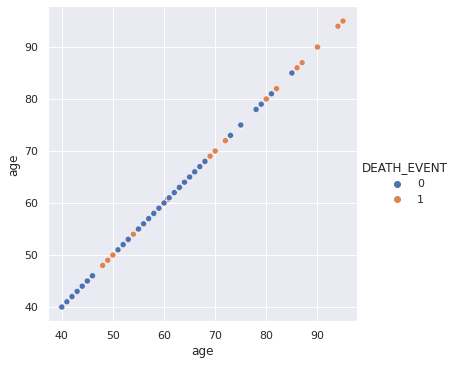

In [25]:
sns.relplot(x="age", y="age", hue="DEATH_EVENT", data=train_data)

osservazioni:
- valore minimo:40, valore massimo:95
- valore medio:60
- genericamente DEATH_EVENT tende a valere 0 per pazienti vicini ai 40 anni, 1 per i pazienti oltre gli 80 anni


In [26]:
# nel nostro caso possiamo convertire la feature 'Age' in gruppi 'AgeGroup' in base al range
bins = [0,40,50,60,70,80,100]
labels = ['0-39','40-49','50-59','60-69','70-79','80-100']
train_data['ageGroup'] = pd.cut(train_data['age'], bins=bins, labels=labels, right=False)
test_data['ageGroup'] = pd.cut(test_data['age'], bins=bins, labels=labels, right=False)

In [27]:
# se ci fossero valori al di fuori dei range definiti (es. età < 0) 
# queste non cadrebbero all'interno di nessun gruppo e porterebbero un valore nullo per il campo ageGroup
# quindi eliminiamo eventuali valori nulli
train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [28]:
# la feature 'age' ora possiamo rimuoverla tranquillamente
train_data = train_data.drop('age', axis=1)
test_data = test_data.drop('age', axis=1)

<AxesSubplot:xlabel='ageGroup', ylabel='count'>

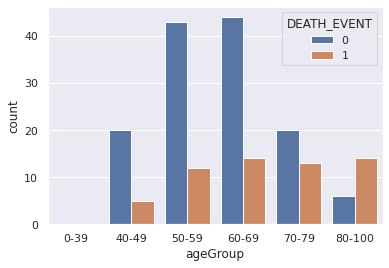

In [29]:
sns.countplot(x='ageGroup', hue='DEATH_EVENT', data=train_data)

feature **creatinine_phosphokinase**

In [30]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['creatinine_phosphokinase'], errors='coerce')
pd.to_numeric(test_data['creatinine_phosphokinase'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [31]:
train_data['creatinine_phosphokinase'].describe()

count     191.000000
mean      580.560209
std      1000.309497
min        23.000000
25%       109.500000
50%       233.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

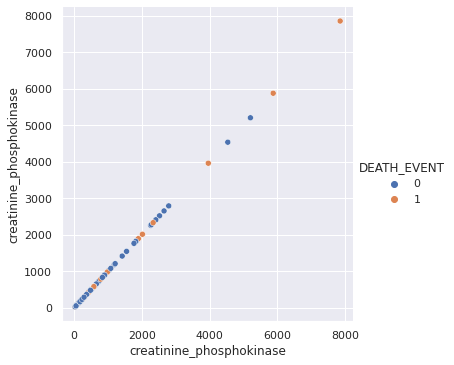

In [32]:
g = sns.relplot(x="creatinine_phosphokinase", y="creatinine_phosphokinase", hue="DEATH_EVENT", data=train_data)
#g.set(ylim=(0, 3000))
#g.set(xlim=(0, 3000))

osservazioni:
- valore minimo:23, valore massimo:7861
- valore medio:580
- oltre il valore 3000 ci sono rarissimi casi
- è la feature con il più alto numero di classi


In [33]:
# Ricerca: I valori normali di creatinchinasi non sono facilmente individuabili, 
# poiché possono essere influenzati da diversi fattori, tra cui età, sesso, massa muscolare...
# Tuttavia, questi rientrano solitamente nell'intervallo 30-200 U/L (mcg/L).

In [34]:
# nel nostro caso possiamo convertire la feature 'creatinine_phosphokinase' in gruppi 'cpkGroup' in base al range
bins = [0,30,200,500,1000,3000,8000]
labels = ['0-29','30-199','200-499','500-999','1000-2999','3000-8000']
train_data['cpkGroup'] = pd.cut(train_data['creatinine_phosphokinase'], bins=bins, labels=labels, right=False)
test_data['cpkGroup'] = pd.cut(test_data['creatinine_phosphokinase'], bins=bins, labels=labels, right=False)

In [35]:
# se ci fossero valori al di fuori dei range definiti
# queste non cadrebbero all'interno di nessun gruppo e porterebbero un valore nullo per il campo cpkGroup
# quindi eliminiamo eventuali valori nulli
train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [36]:
# la feature 'creatinine_phosphokinase' ora possiamo rimuoverla tranquillamente
train_data = train_data.drop('creatinine_phosphokinase', axis=1)
test_data = test_data.drop('creatinine_phosphokinase', axis=1)

<AxesSubplot:xlabel='cpkGroup', ylabel='count'>

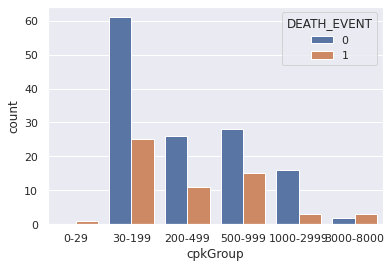

In [37]:
sns.countplot(x='cpkGroup', hue='DEATH_EVENT', data=train_data)

feature **ejection_fraction**

In [38]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['ejection_fraction'], errors='coerce')
pd.to_numeric(test_data['ejection_fraction'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [39]:
train_data['ejection_fraction'].describe()

count    191.000000
mean      37.801047
std       11.323111
min       15.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       70.000000
Name: ejection_fraction, dtype: float64

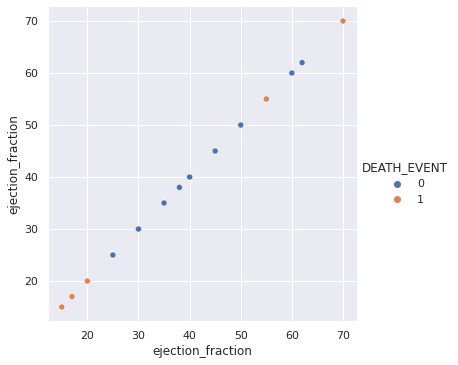

In [40]:
sns.relplot(x="ejection_fraction", y="ejection_fraction", hue="DEATH_EVENT", data=train_data)

osservazioni:
- valore minimo:15, valore massimo:70
- valore medio:37
- genericamente DEATH_EVENT tende a valere 1 per pazienti che hanno una percentuale di ejection bassa (<25%)

In [41]:
# nel nostro caso possiamo convertire la feature 'ejection_fraction' in gruppi 'ejectGroup' in base al range
bins = [0,25,50,75,100]
labels = ['0-24','25-49','50-74','75-100']
train_data['ejectGroup'] = pd.cut(train_data['ejection_fraction'], bins=bins, labels=labels, right=False)
test_data['ejectGroup'] = pd.cut(test_data['ejection_fraction'], bins=bins, labels=labels, right=False)

In [42]:
# se ci fossero valori al di fuori dei range definiti
# queste non cadrebbero all'interno di nessun gruppo e porterebbero un valore nullo per il campo ejectGroup
# quindi eliminiamo eventuali valori nulli
train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [43]:
# la feature 'ejection_fraction' ora possiamo rimuoverla tranquillamente
train_data = train_data.drop('ejection_fraction', axis=1)
test_data = test_data.drop('ejection_fraction', axis=1)

<AxesSubplot:xlabel='ejectGroup', ylabel='count'>

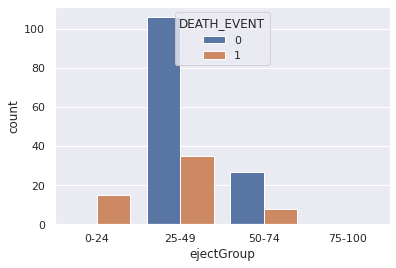

In [44]:
sns.countplot(x='ejectGroup', hue='DEATH_EVENT', data=train_data)

feature **platelets**

In [45]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['platelets'], errors='coerce')
pd.to_numeric(test_data['platelets'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [46]:
train_data['platelets'].describe()

count       191.000000
mean     257237.541623
std       87310.444025
min       47000.000000
25%      210500.000000
50%      262000.000000
75%      302500.000000
max      533000.000000
Name: platelets, dtype: float64

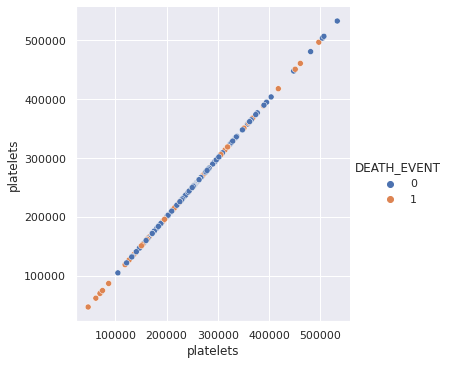

In [47]:
sns.relplot(x="platelets", y="platelets", hue="DEATH_EVENT", data=train_data)

osservazioni:
- valore minimo:47000, valore massimo:533000
- valore medio:257237
- è la seconda feature con il più alto numero di classi

In [48]:
#Ricerca:In un individuo adulto, in buono stato di salute, questo valore si aggira tra le 150.000 e le 450.000

In [49]:
# nel nostro caso possiamo convertire la feature 'platelets' in gruppi 'pltGroup' in base al range
bins = [0,150000,450000,1000000]
labels = ['basso','normale','alto']
train_data['pltGroup'] = pd.cut(train_data['platelets'], bins=bins, labels=labels, right=False)
test_data['pltGroup'] = pd.cut(test_data['platelets'], bins=bins, labels=labels, right=False)

In [50]:
# se ci fossero valori al di fuori dei range definiti
# queste non cadrebbero all'interno di nessun gruppo e porterebbero un valore nullo per il campo pltGroup
# quindi eliminiamo eventuali valori nulli
train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [51]:
# la feature 'platelets' ora possiamo rimuoverla tranquillamente
train_data = train_data.drop('platelets', axis=1)
test_data = test_data.drop('platelets', axis=1)

<AxesSubplot:xlabel='pltGroup', ylabel='count'>

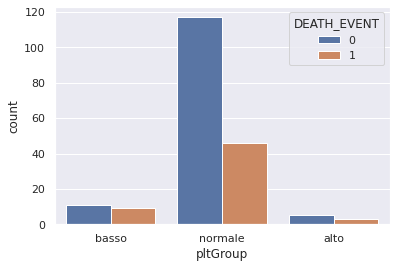

In [52]:
sns.countplot(x='pltGroup', hue='DEATH_EVENT', data=train_data)

feature **serum_creatinine**

In [53]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['serum_creatinine'], errors='coerce')
pd.to_numeric(test_data['serum_creatinine'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [54]:
train_data['serum_creatinine'].describe()

count    191.000000
mean       1.414503
std        1.063606
min        0.500000
25%        0.900000
50%        1.100000
75%        1.400000
max        9.000000
Name: serum_creatinine, dtype: float64

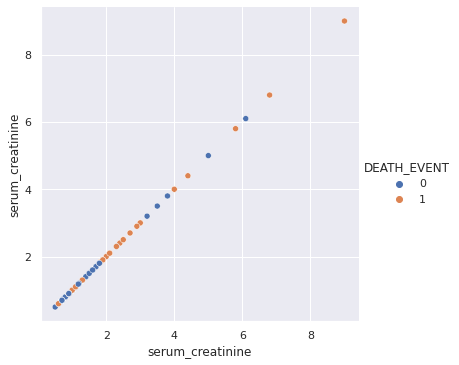

In [55]:
sns.relplot(x="serum_creatinine", y="serum_creatinine", hue="DEATH_EVENT", data=train_data)

osservazioni:
- valore minimo:0.5, valore massimo:9
- valore medio:1.4

In [56]:
#Ricerca: Il valore normale per la creatinina nel sangue può essere compreso tra 0,8 a 1,3 milligrammi per decilitro (mg/dl)r

In [57]:
# nel nostro caso possiamo convertire la feature 'serum_creatinine' in gruppi 'creatinineGroup' in base al range
bins = [0,0.8,1.3,10]
labels = ['basso','normale','alto']
train_data['creatinineGroup'] = pd.cut(train_data['serum_creatinine'], bins=bins, labels=labels, right=False)
test_data['creatinineGroup'] = pd.cut(test_data['serum_creatinine'], bins=bins, labels=labels, right=False)

In [58]:
# se ci fossero valori al di fuori dei range definiti
# queste non cadrebbero all'interno di nessun gruppo e porterebbero un valore nullo per il campo creatinineGroup
# quindi eliminiamo eventuali valori nulli
train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [59]:
# NON rimuoviamo la feature 'serum_creatinine' poichè utilizzarla porta a risultati migliori rispetto
# all'uso della feature 'creatinineGroup'
#train_data = train_data.drop('serum_creatinine', axis=1)
#test_data = test_data.drop('serum_creatinine', axis=1)

<AxesSubplot:xlabel='creatinineGroup', ylabel='count'>

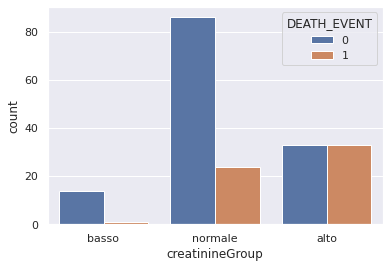

In [60]:
sns.countplot(x='creatinineGroup', hue='DEATH_EVENT', data=train_data)

feature **serum_sodium**

In [61]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['serum_sodium'], errors='coerce')
pd.to_numeric(test_data['serum_sodium'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [62]:
train_data['serum_sodium'].describe()

count    191.000000
mean     136.465969
std        4.560430
min      113.000000
25%      134.000000
50%      137.000000
75%      139.000000
max      146.000000
Name: serum_sodium, dtype: float64

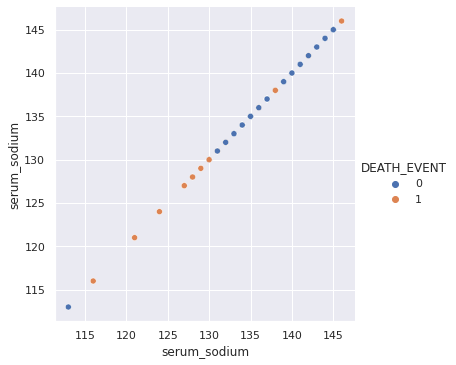

In [63]:
sns.relplot(x="serum_sodium", y="serum_sodium", hue="DEATH_EVENT", data=train_data)

osservazioni:
- valore minimo:113, valore massimo:146
- valore medio:136
- genericamente DEATH_EVENT tende a valere 1 per pazienti che hanno un basso livello di sodio nel sangue (<130)

In [64]:
# Ricerca: L'intervallo di riferimento è 135-145 mmol/l

In [65]:
# nel nostro caso possiamo convertire la feature 'serum_sodium' in gruppi 'sodiumGroup' in base al range
bins = [0,135,145,300]
labels = ['basso','normale','alto']
train_data['sodiumGroup'] = pd.cut(train_data['serum_sodium'], bins=bins, labels=labels, right=False)
test_data['sodiumGroup'] = pd.cut(test_data['serum_sodium'], bins=bins, labels=labels, right=False)

In [66]:
# se ci fossero valori al di fuori dei range definiti
# queste non cadrebbero all'interno di nessun gruppo e porterebbero un valore nullo per il campo sodiumGroup
# quindi eliminiamo eventuali valori nulli
train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [67]:
# la feature 'serum_sodium' ora possiamo rimuoverla tranquillamente
train_data = train_data.drop('serum_sodium', axis=1)
test_data = test_data.drop('serum_sodium', axis=1)

<AxesSubplot:xlabel='sodiumGroup', ylabel='count'>

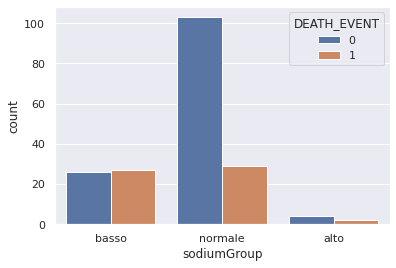

In [68]:
sns.countplot(x='sodiumGroup', hue='DEATH_EVENT', data=train_data)

feature **time**

In [69]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['time'], errors='coerce')
pd.to_numeric(test_data['time'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [70]:
train_data['time'].describe()

count    191.000000
mean     130.193717
std       76.675867
min        4.000000
25%       73.500000
50%      115.000000
75%      200.500000
max      285.000000
Name: time, dtype: float64

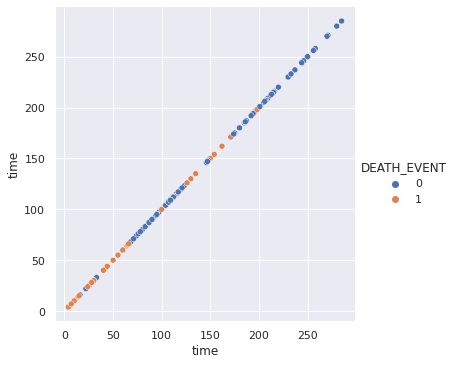

In [71]:
g = sns.relplot(x="time", y="time", hue="DEATH_EVENT", data=train_data)
#g.set(ylim=(70, 200))
#g.set(xlim=(70, 200))

osservazioni:
- valore minimo:4, valore massimo:285
- valore medio:130
- genericamente DEATH_EVENT tende a valere 1 per pazienti che hanno un basso intervallo di osservazione (<70)

In [72]:
# nel nostro caso possiamo convertire la feature 'time' in gruppi 'timeGroup' in base al range
bins = [0,70,200,1000]
labels = ['basso','normale','alto']
train_data['timeGroup'] = pd.cut(train_data['time'], bins=bins, labels=labels, right=False)
test_data['timeGroup'] = pd.cut(test_data['time'], bins=bins, labels=labels, right=False)

In [73]:
# se ci fossero valori al di fuori dei range definiti
# queste non cadrebbero all'interno di nessun gruppo e porterebbero un valore nullo per il campo timeGroup
# quindi eliminiamo eventuali valori nulli
train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

In [74]:
# la feature 'time' ora possiamo rimuoverla tranquillamente
train_data = train_data.drop('time', axis=1)
test_data = test_data.drop('time', axis=1)

<AxesSubplot:xlabel='timeGroup', ylabel='count'>

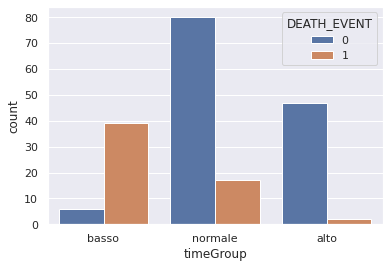

In [75]:
sns.countplot(x='timeGroup', hue='DEATH_EVENT', data=train_data)

In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   anaemia              191 non-null    int64   
 1   diabetes             191 non-null    int64   
 2   high_blood_pressure  191 non-null    int64   
 3   serum_creatinine     191 non-null    float64 
 4   sex                  191 non-null    int64   
 5   smoking              191 non-null    int64   
 6   DEATH_EVENT          191 non-null    int64   
 7   ageGroup             191 non-null    category
 8   cpkGroup             191 non-null    category
 9   ejectGroup           191 non-null    category
 10  pltGroup             191 non-null    category
 11  creatinineGroup      191 non-null    category
 12  sodiumGroup          191 non-null    category
 13  timeGroup            191 non-null    category
dtypes: category(7), float64(1), int64(6)
memory usage: 19.2 KB


In [77]:
# consideriamo ora le features che hanno una funzione categorica
cat_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

feature **anaemia**

In [78]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['anaemia'], errors='coerce')
pd.to_numeric(test_data['anaemia'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

<AxesSubplot:xlabel='anaemia', ylabel='count'>

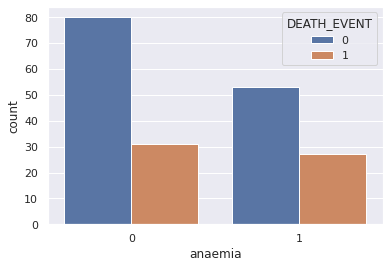

In [79]:
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=train_data)

feature **diabetes**

In [80]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['diabetes'], errors='coerce')
pd.to_numeric(test_data['diabetes'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

<AxesSubplot:xlabel='diabetes', ylabel='count'>

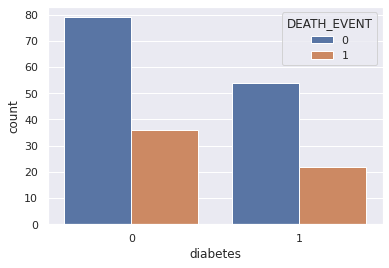

In [81]:
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=train_data)

feature **high_blood_pressure**

In [82]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['high_blood_pressure'], errors='coerce')
pd.to_numeric(test_data['high_blood_pressure'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

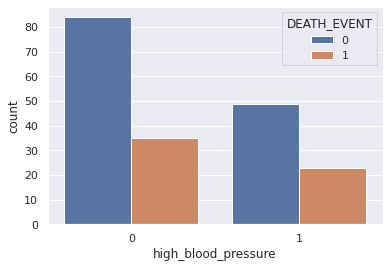

In [83]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=train_data)

feature **sex**

In [84]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['sex'], errors='coerce')
pd.to_numeric(test_data['sex'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

<AxesSubplot:xlabel='sex', ylabel='count'>

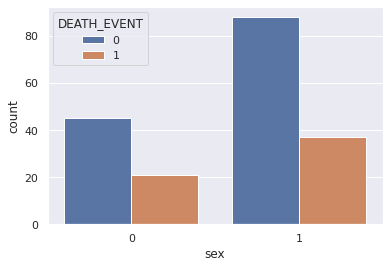

In [85]:
sns.countplot(x='sex', hue='DEATH_EVENT', data=train_data)

feature **smoking**

In [86]:
#evito eventuali valori anomali non numerici
pd.to_numeric(train_data['smoking'], errors='coerce')
pd.to_numeric(test_data['smoking'], errors='coerce')

train_data = train_data.dropna(axis=0) #any
test_data = test_data.dropna(axis=0) #any

<AxesSubplot:xlabel='smoking', ylabel='count'>

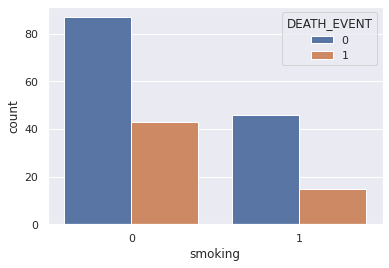

In [87]:
sns.countplot(x='smoking', hue='DEATH_EVENT', data=train_data)

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   anaemia              191 non-null    int64   
 1   diabetes             191 non-null    int64   
 2   high_blood_pressure  191 non-null    int64   
 3   serum_creatinine     191 non-null    float64 
 4   sex                  191 non-null    int64   
 5   smoking              191 non-null    int64   
 6   DEATH_EVENT          191 non-null    int64   
 7   ageGroup             191 non-null    category
 8   cpkGroup             191 non-null    category
 9   ejectGroup           191 non-null    category
 10  pltGroup             191 non-null    category
 11  creatinineGroup      191 non-null    category
 12  sodiumGroup          191 non-null    category
 13  timeGroup            191 non-null    category
dtypes: category(7), float64(1), int64(6)
memory usage: 19.2 KB


In [89]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   anaemia              48 non-null     int64   
 1   diabetes             48 non-null     int64   
 2   high_blood_pressure  48 non-null     int64   
 3   serum_creatinine     48 non-null     float64 
 4   sex                  48 non-null     int64   
 5   smoking              48 non-null     int64   
 6   DEATH_EVENT          48 non-null     int64   
 7   ageGroup             48 non-null     category
 8   cpkGroup             48 non-null     category
 9   ejectGroup           48 non-null     category
 10  pltGroup             48 non-null     category
 11  creatinineGroup      48 non-null     category
 12  sodiumGroup          48 non-null     category
 13  timeGroup            48 non-null     category
dtypes: category(7), float64(1), int64(6)
memory usage: 4.3 KB


### Label Encoding

Effettuiamo il label encoding delle colonne categoriche che abbiamo creato

In [90]:
label_encoder = LabelEncoder()
object_columns = ['ageGroup', 'cpkGroup','ejectGroup','pltGroup', 'creatinineGroup', 'sodiumGroup', 'timeGroup']

for feature in object_columns:
    train_data[feature] = label_encoder.fit_transform(train_data[feature])
    test_data[feature] = label_encoder.fit_transform(test_data[feature])

### Heatmap

Visualizziamo le correlazioni tra le feature per stabilire le nostre scelte

<AxesSubplot:>

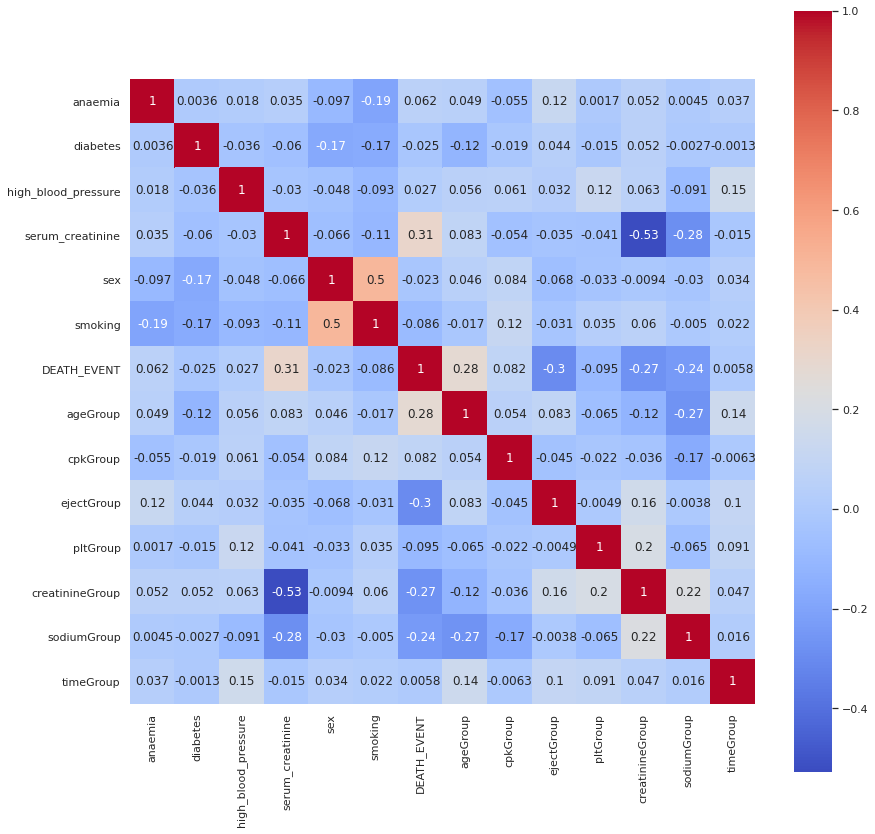

In [91]:
plt.subplots(figsize=(14,14))
sns.heatmap(train_data.corr(), square=True, annot=True, cmap='coolwarm')

In [92]:
#print(train_data.corr())

Possiamo quindi constatare che sia utile rimuovere alcune feature 
- quasi tutte le feature di 'Gruppi' introdotte presentano un miglioramento in correlazione a DEATH_EVENT
- le eccezioni sono ageGroup', 'creatinineGroup'
- 'ageGroup' peggiora di poco rispetto alla feature 'age' dunque potrebbe essere comunque utilizzata poichè il peggioramento potrebbe essere causato dal fatto di avere pochi dati
- 'creatinineGroup' peggiora in modo significativo rispetto a 'serum_creatinine', ma bisogna sempre considerare di avere pochi dati

In [93]:
#age già eliminata precedentemente
drop_list= ['serum_creatinine']
train_data = train_data.drop(columns=drop_list)
test_data = test_data.drop(columns=drop_list)

In [94]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   anaemia              191 non-null    int64
 1   diabetes             191 non-null    int64
 2   high_blood_pressure  191 non-null    int64
 3   sex                  191 non-null    int64
 4   smoking              191 non-null    int64
 5   DEATH_EVENT          191 non-null    int64
 6   ageGroup             191 non-null    int64
 7   cpkGroup             191 non-null    int64
 8   ejectGroup           191 non-null    int64
 9   pltGroup             191 non-null    int64
 10  creatinineGroup      191 non-null    int64
 11  sodiumGroup          191 non-null    int64
 12  timeGroup            191 non-null    int64
dtypes: int64(13)
memory usage: 25.9 KB


In [95]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   anaemia              48 non-null     int64
 1   diabetes             48 non-null     int64
 2   high_blood_pressure  48 non-null     int64
 3   sex                  48 non-null     int64
 4   smoking              48 non-null     int64
 5   DEATH_EVENT          48 non-null     int64
 6   ageGroup             48 non-null     int64
 7   cpkGroup             48 non-null     int64
 8   ejectGroup           48 non-null     int64
 9   pltGroup             48 non-null     int64
 10  creatinineGroup      48 non-null     int64
 11  sodiumGroup          48 non-null     int64
 12  timeGroup            48 non-null     int64
dtypes: int64(13)
memory usage: 5.2 KB


### Data Split

In [96]:
y_train = train_data['DEATH_EVENT']
X_train = train_data.drop('DEATH_EVENT', axis=1)

y_test = test_data['DEATH_EVENT']
X_test = test_data.drop('DEATH_EVENT', axis=1)

## Training

Iniziamo la nostra fase di training dove confronteremo **LogisticRegression** e **DecisionTreeClassifier** 

per la **LogisticRegression** scegliamo di impostare i seguenti paramentri:

- penalty: L2 (default), sfruttiamo la Regolarizzazione L2 che penalizza i paramentri molto alti (a causa dell'elevamento al quadrato)
- C: 0.1 , specifica la forza della Regolarizzazione; valori più piccoli specificano una Regolarizzazione più forte
- max_iter:1000, numero massimo di iterazioni per convergere

In [97]:
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(C=0.1, max_iter= 1000)
#model.fit(X_train, y_train)

In [98]:
#y_pred = model.predict(X_test)

In [99]:
#accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
#mae = round(mean_absolute_error(y_test, y_pred)*100, 2)
#print(accuracy)
#print(mae)

In [100]:
#plot_confusion_matrix(model, X_test, y_test)

### Modello scelto: DecisionTreeClassifier

per il **DecisionTreeClassifier** scegliamo di impostare i seguenti paramentri:

- criterion: 'entropy' per sfruttare lo split bastato sull'Information Gain, ovvero sfruttare l'informazione guadagnata su una variabile casuale risultante dall'osservazione di un'altra variabile casuale
- se non specificassimo il criterion, il valore di default sarebbe 'gini' che sfrutta Gini impurity
- max_depth:3 stabilisce quanto vogliamo che siano profondi i nostri alberi, sopratutto previene l'overfitting

In [101]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [102]:
dtc_pred = dtc.predict(X_test)

In [103]:
dtc_accuracy = round(accuracy_score(y_test, dtc_pred)*100, 2)
dtc_mae = round(mean_absolute_error(y_test, dtc_pred)*100, 2)
print('Accuracy:{}%'.format(dtc_accuracy))
print('MAE:{}%'.format(dtc_mae))

Accuracy:85.42%
MAE:14.58%


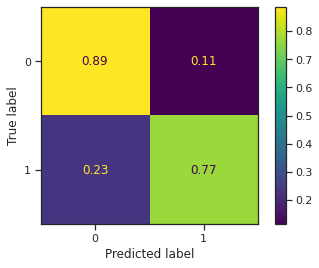

In [104]:
sns.set_theme(style="ticks")
plot_confusion_matrix(dtc, X_test, y_test, normalize='true')

#### Osservazioni:
- Facendo vari test, nei risultati ottenuti nella matrice di confusione si evidenzia un'oscillazione delle Predict delle label
- Questo probabilmente è causato dal fatto di avere pochi dati a disposizione

## Pipeline Version

In [105]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('model', DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3))
])

In [106]:
pipe = pipe.fit(X_train, y_train)
print('Testing score: {}'.format(pipe.score(X_test, y_test)))

Testing score: 0.8541666666666666
